In [15]:
%matplotlib inline
import theano
from theano.tensor.shared_randomstreams import RandomStreams
import theano
import theano.tensor as T
from IPython.display import SVG

# 그래프 최적화

In [3]:
x1 = T.vector('x1')
y1 = x1 ** 10
f1 = theano.function([x1], y1)

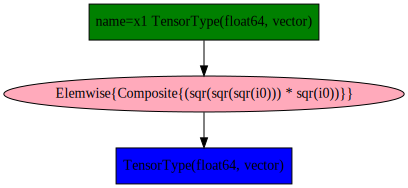

In [9]:
SVG(theano.printing.pydotprint(f1, return_image=True, format='svg'))

In [5]:
x1 = np.ones(10000000)

In [7]:
%timeit x1 ** 10

149 ms ± 9.09 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [6]:
%timeit f1(x1)

57.9 ms ± 2.96 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# 미분

In [12]:
x1 = T.dscalar('x1')
s1 = 1 / (1 + T.exp(-x1))
logistic = theano.function([x1], s1)
gs1 = T.grad(s1, x1)
dlogistic = theano.function([x1], gs1)

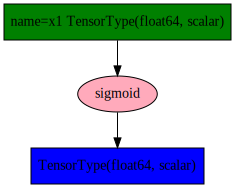

In [13]:
SVG(theano.printing.pydotprint(logistic, return_image=True, format='svg'))

<IPython.core.display.Javascript object>


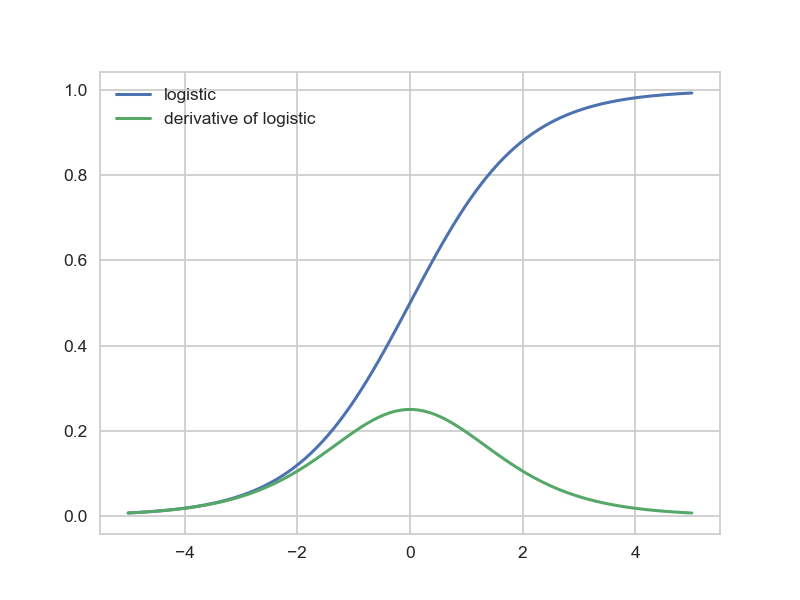

In [14]:
xx = np.linspace(-5, 5, 100)
y1 = np.hstack([logistic(xi) for xi in xx])
y2 = np.hstack([dlogistic(xi) for xi in xx])
plt.plot(xx, y1, label="logistic")
plt.plot(xx, y2, label="derivative of logistic")
plt.legend(loc=0)
plt.show()

# 퍼셉트론 구현

In [19]:
from sklearn.datasets import load_iris
iris = load_iris()

idx = np.in1d(iris.target, [0, 2])
X_data = iris.data[idx, 0:2]
y_data = iris.target[idx] - 1 # 1과 -1로 바꾸기위해서 -1을 해줌

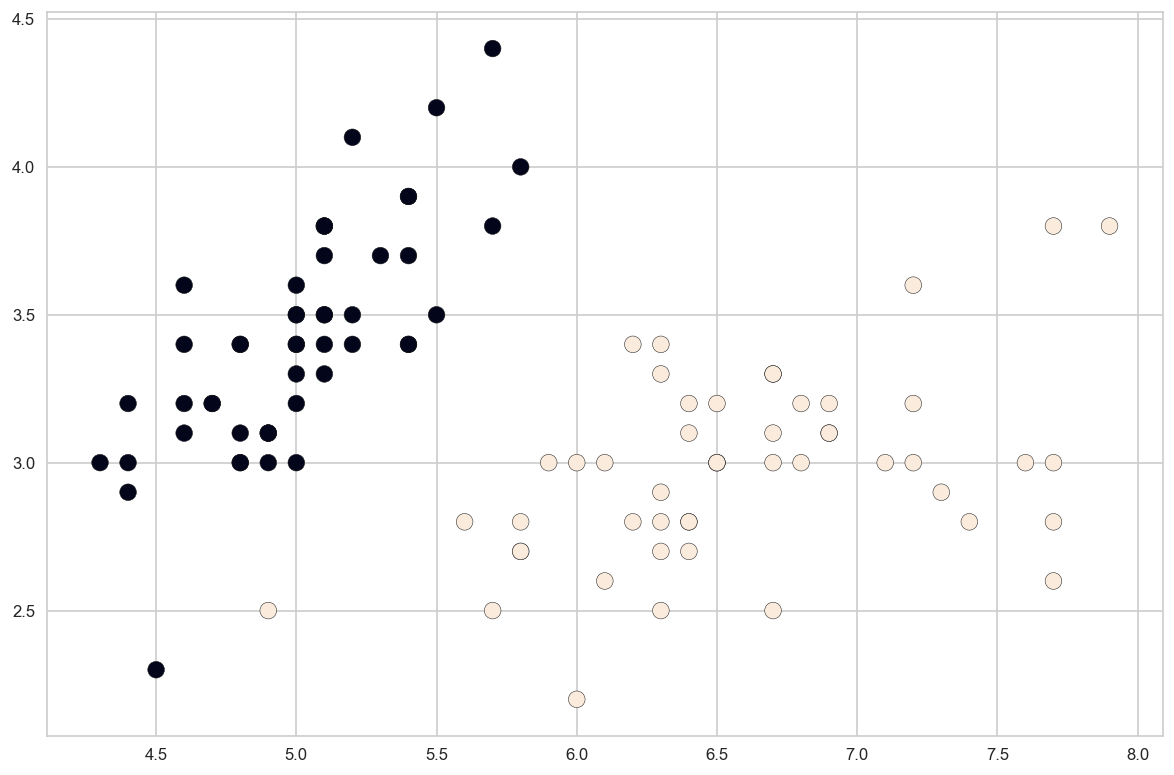

In [20]:
plt.figure(figsize=(12, 8), dpi=60)
plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=100, edgecolor='k')
plt.show()

In [21]:
X = T.dmatrix('X')
y = T.dvector('y')
np.random.seed(0)
w = theano.shared(0.001 * np.random.randn(2), name='w')
b = theano.shared(0.001 * np.random.randn(1)[0], name='b')
d = T.tanh(T.dot(X,w) + b)
cost = T.sum(T.maximum(0, -y * d))

In [22]:
gw, gb = T.grad(cost, [w, b])
mu = 1e-7
gradient = theano.function([X, y], cost, updates=[(w, w - mu * gw), (b, b - mu * gb)])

In [23]:
for i in range(100):
    cost_i = gradient(X_data, y_data)
    if i % 10 == 0:
        print("{:4d}: ".format(i), cost_i)

   0:  0.5588424928848522
  10:  0.46450587187229153
  20:  0.3701625011442721
  30:  0.2758137467032815
  40:  0.1814609749853409
  50:  0.08710555275029543
  60:  0.0017481157550489135
  70:  0.00031948220262706216
  80:  0.00029294220762887224
  90:  0.00029210620994643967


In [24]:
y_pred = T.sgn(d)
y_pred_func = theano.function([X], y_pred)
y_pred = y_pred_func(X_data)
y_pred

array([-1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.])

In [25]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_data, y_pred)

array([[49,  1],
       [ 1, 49]], dtype=int64)

In [95]:
iris = load_iris()

idx = np.in1d(iris.target, [0, 2])
X_data = iris.data[idx, 0:2]
y_data = iris.target[idx] / 2.0 # 1과 -1로 바꾸기위해서 -1을 해줌

In [90]:
s1 = 1 / (1 + T.exp(-X))

In [97]:
X = T.dmatrix('X')
y = T.dvector('y')
np.random.seed(0)
w = theano.shared(0.001 * np.random.randn(2), name="w")
b = theano.shared(0.001 * np.random.randn(1)[0], name="b")
d = 1.0 / (1.0 + T.exp(-T.dot(X, w) - b))
cost = T.sum((y - d)**2)

In [98]:
gw, gb = T.grad(cost, [w, b])
mu = 1e-3
gradient = theano.function([X, y], cost, updates=[(w, w - mu * gw), (b, b - mu * gb)])

In [99]:
for i in range(100):
    cost_i = gradient(X_data, y_data)
    if i % 10 == 0:
        print("{:4d}: ".format(i), cost_i)

   0:  24.9683287358724
  10:  22.842399012134187
  20:  21.07926870244293
  30:  19.508095955930617
  40:  18.113988545751926
  50:  16.87910419647712
  60:  15.78499787570115
  70:  14.814038010403285
  80:  13.950137987378778
  90:  13.179039632284697


In [105]:
y_pred = (T.sgn(d - 0.5) + 1) / 2.0 # 0.5를 기준으로 위쪽은 양수 아래쪽은 음수, 그걸 1을 더해서 올린 후 2로 나눠서 1,0으로 만든다
y_pred_func = theano.function([X], y_pred)
y_pred = y_pred_func(X_data)
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [106]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_data, y_pred)

array([[49,  1],
       [ 0, 50]], dtype=int64)

# TensorFlow 패키지 소개 (1.6 ~ 1.7버전 기준)
 - 심볼 변수 정의
 - 심볼 관계 정의
 - 세션 정의, 세션은 Theano의 함수와 유사한 역할
 - 세션 사용

In [108]:
import tensorflow as tf

In [124]:
idx = np.in1d(iris.target, [0, 2])
X_data = iris.data[idx, 0:2]
y_data = (iris.target[idx] / 2.0)[:, np.newaxis]

In [129]:
np.random.seed(0)
w = tf.Variable(1e-3 * np.random.randn(2, 1))
b = tf.Variable(1e-3 * np.random.randn(1)[0])
d = tf.sigmoid(tf.matmul(X_data,w) - b)

zero = np.zeros(1, dtype=np.float64)[0]
cost = tf.reduce_sum((y_data-d)**2)
optimizer = tf.train.GradientDescentOptimizer(1e-3)
train = optimizer.minimize(cost)

sess = tf.Session()

w_summary = tf.summary.histogram("w", w)
b_summary = tf.summary.histogram("b", b)
d_summary = tf.summary.histogram("d", d)
cost_summary = tf.summary.histogram("cost", cost)
merged = tf.summary.merge([w_summary, b_summary, d_summary, cost_summary])

init = tf.global_variables_initializer()
sess.run(init)

writer = tf.summary.FileWriter("C:/Users/user/Desktop/logs/", sess.graph)

for i in range(100):
    sess.run(train)
    summary = sess.run(merged)
    writer.add_summary(summary, i)
    if i % 10 == 0:
        print("{:4d}: ".format(i), sess.run(cost))

   0:  24.626504434528044
  10:  22.653334115685
  20:  20.91026031898261
  30:  19.357852464033435
  40:  17.980781601346656
  50:  16.76105523431814
  60:  15.68026040810863
  70:  14.720898722602621
  80:  13.86706229014417
  90:  13.104683023638334


In [130]:
y_pred = sess.run((tf.sign(d - 0.5) + 1) / 2.0)

In [131]:
sess.close()

In [132]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_data, y_pred)

array([[49,  1],
       [ 0, 50]], dtype=int64)

# Keras 패키지를 사용한 신경망 구현

In [133]:
%%time
from keras.datasets import mnist
(X_train0, y_train0), (X_test0, y_test0) = mnist.load_data()

C:\Users\user\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


11493376/11490434 [==============================] - 89s 8us/step
Wall time: 1min 32s


In [288]:
print(X_train0.shape, X_train0.dtype)
print(y_train0.shape, y_train0.dtype)
print(X_test0.shape, X_test0.dtype)
print(y_test0.shape, y_test0.dtype)

(60000, 28, 28) uint8
(60000,) uint8
(10000, 28, 28) uint8
(10000,) uint8


In [289]:
X_train = X_train0.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test0.reshape(10000, 784).astype('float32') / 255.0
print(X_train.shape, X_train.dtype)

(60000, 784) float32


In [290]:
y_train0[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [291]:
from keras.utils import np_utils

Y_train = np_utils.to_categorical(y_train0, 10)
Y_test = np_utils.to_categorical(y_test0, 10)
Y_train[:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

 - Dense   < - >  Convolution
 -Fully
 -Connected
 -Network

In [298]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

np.random.seed(0)

model = Sequential()
model.add(Dense(5, input_dim=784, activation="sigmoid"))
model.add(Dense(10, activation="sigmoid"))
model.compile(optimizer=SGD(lr=0.1), loss='mean_squared_error', metrics=["accuracy"])

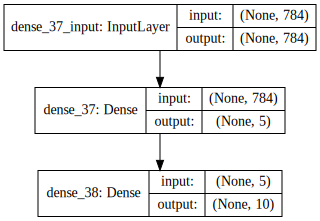

In [299]:
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [300]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 5)                 3925      
_________________________________________________________________
dense_38 (Dense)             (None, 10)                60        
Total params: 3,985
Trainable params: 3,985
Non-trainable params: 0
_________________________________________________________________


In [301]:
l1 = model.layers[0]
l2 = model.layers[1]

In [302]:
l1.name, type(l1), l1.output_shape, l1.activation.__name__, l1.count_params()

('dense_37', keras.layers.core.Dense, (None, 5), 'sigmoid', 3925)

In [303]:
l2.name, type(l2), l2.output_shape, l2.activation.__name__, l2.count_params()

('dense_38', keras.layers.core.Dense, (None, 10), 'sigmoid', 60)

In [305]:
%%time
hist = model.fit(X_train, Y_train, 
                 epochs=30, batch_size=100, 
                 validation_data=(X_test, Y_test), 
                 verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 1s - loss: 0.0418 - acc: 0.8178 - val_loss: 0.0414 - val_acc: 0.8167
Epoch 2/30
 - 1s - loss: 0.0415 - acc: 0.8193 - val_loss: 0.0411 - val_acc: 0.8200
Epoch 3/30
 - 1s - loss: 0.0412 - acc: 0.8215 - val_loss: 0.0409 - val_acc: 0.8204
Epoch 4/30
 - 1s - loss: 0.0410 - acc: 0.8224 - val_loss: 0.0406 - val_acc: 0.8224
Epoch 5/30
 - 1s - loss: 0.0407 - acc: 0.8239 - val_loss: 0.0404 - val_acc: 0.8240
Epoch 6/30
 - 1s - loss: 0.0405 - acc: 0.8255 - val_loss: 0.0401 - val_acc: 0.8252
Epoch 7/30
 - 1s - loss: 0.0402 - acc: 0.8268 - val_loss: 0.0399 - val_acc: 0.8267
Epoch 8/30
 - 1s - loss: 0.0400 - acc: 0.8278 - val_loss: 0.0396 - val_acc: 0.8272
Epoch 9/30
 - 1s - loss: 0.0397 - acc: 0.8285 - val_loss: 0.0394 - val_acc: 0.8276
Epoch 10/30
 - 1s - loss: 0.0395 - acc: 0.8297 - val_loss: 0.0391 - val_acc: 0.8288
Epoch 11/30
 - 1s - loss: 0.0392 - acc: 0.8310 - val_loss: 0.0389 - val_acc: 0.8295
Epoch 12/30
 - 1s - loss: 0.0390 - 

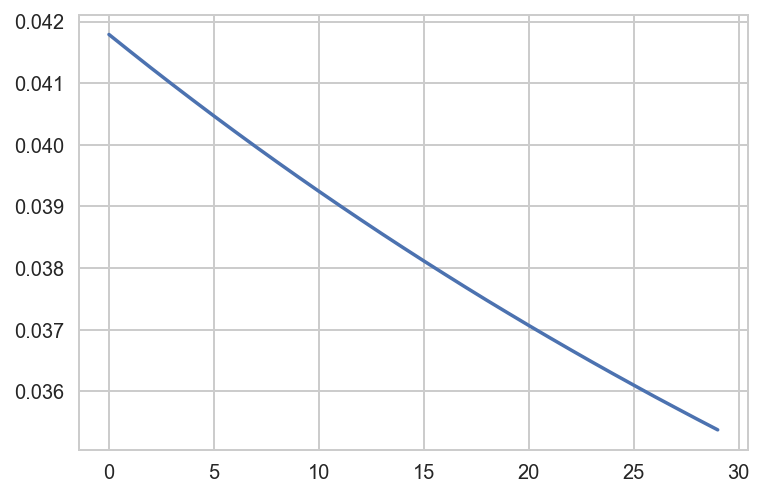

In [306]:
plt.plot(hist.history['loss'])
plt.show()

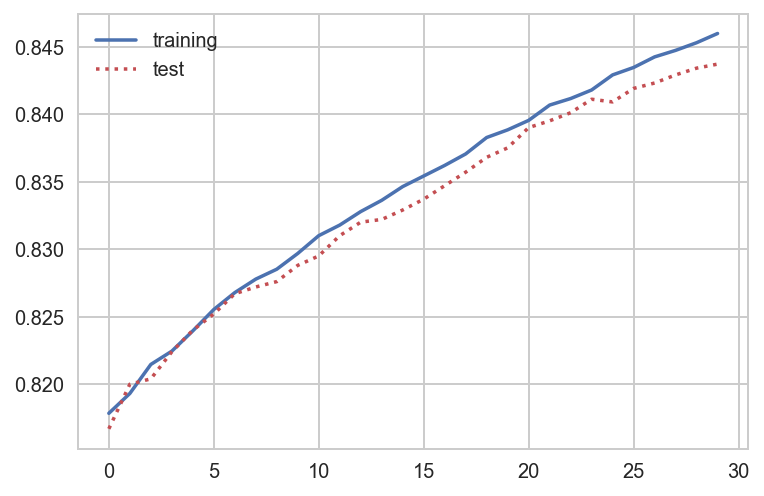

In [307]:
plt.plot(hist.history['acc'], 'b-', label="training")
plt.plot(hist.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

### iris 문제

In [214]:
from sklearn import model_selection

In [215]:
X = iris.data
y = iris.target

In [216]:
X_train, X_validation, y_train, y_validation = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 0)

In [217]:
print(X_train.shape, X_train.dtype)
print(y_train.shape, y_train.dtype)
print(X_validation.shape, X_validation.dtype)
print(y_validation.shape, y_validation.dtype)

(120, 4) float64
(120,) int32
(30, 4) float64
(30,) int32


In [218]:
y_train = np_utils.to_categorical(y_train, 3)
y_validation = np_utils.to_categorical(y_validation, 3)
y_train[:3]

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [281]:
model2 = Sequential()
model2.add(Dense(4, input_dim=4, activation='sigmoid'))
model2.add(Dense(3, activation='sigmoid'))
model2.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=['accuracy'])

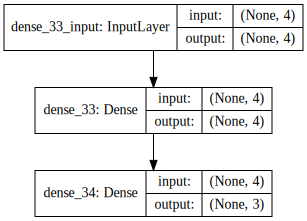

In [282]:
SVG(model_to_dot(model2, show_shapes=True).create(prog='dot', format='svg'))

In [283]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 4)                 20        
_________________________________________________________________
dense_34 (Dense)             (None, 3)                 15        
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [284]:
layer1 = model2.layers[0]
layer2 = model2.layers[1]

In [285]:
%%time
hist2 = model2.fit(X_train, y_train,
                 epochs=600,
                 validation_data=(X_validation, y_validation),
                 verbose=2)

Train on 120 samples, validate on 30 samples
Epoch 1/600
 - 0s - loss: 0.3317 - acc: 0.1750 - val_loss: 0.3506 - val_acc: 0.1667
Epoch 2/600
 - 0s - loss: 0.3093 - acc: 0.3500 - val_loss: 0.3308 - val_acc: 0.1667
Epoch 3/600
 - 0s - loss: 0.2951 - acc: 0.3667 - val_loss: 0.3174 - val_acc: 0.2000
Epoch 4/600
 - 0s - loss: 0.2848 - acc: 0.3667 - val_loss: 0.3068 - val_acc: 0.2000
Epoch 5/600
 - 0s - loss: 0.2763 - acc: 0.3667 - val_loss: 0.2975 - val_acc: 0.2000
Epoch 6/600
 - 0s - loss: 0.2690 - acc: 0.3667 - val_loss: 0.2895 - val_acc: 0.2000
Epoch 7/600
 - 0s - loss: 0.2627 - acc: 0.3667 - val_loss: 0.2826 - val_acc: 0.2000
Epoch 8/600
 - 0s - loss: 0.2572 - acc: 0.3667 - val_loss: 0.2766 - val_acc: 0.2000
Epoch 9/600
 - 0s - loss: 0.2526 - acc: 0.3667 - val_loss: 0.2709 - val_acc: 0.2000
Epoch 10/600
 - 0s - loss: 0.2482 - acc: 0.3667 - val_loss: 0.2659 - val_acc: 0.2000
Epoch 11/600
 - 0s - loss: 0.2444 - acc: 0.3667 - val_loss: 0.2615 - val_acc: 0.2000
Epoch 12/600
 - 0s - loss: 0.

Epoch 97/600
 - 0s - loss: 0.1710 - acc: 0.6917 - val_loss: 0.1760 - val_acc: 0.5667
Epoch 98/600
 - 0s - loss: 0.1703 - acc: 0.6917 - val_loss: 0.1753 - val_acc: 0.5667
Epoch 99/600
 - 0s - loss: 0.1695 - acc: 0.6917 - val_loss: 0.1744 - val_acc: 0.5667
Epoch 100/600
 - 0s - loss: 0.1688 - acc: 0.6917 - val_loss: 0.1735 - val_acc: 0.5667
Epoch 101/600
 - 0s - loss: 0.1681 - acc: 0.6917 - val_loss: 0.1728 - val_acc: 0.5667
Epoch 102/600
 - 0s - loss: 0.1674 - acc: 0.6917 - val_loss: 0.1720 - val_acc: 0.5667
Epoch 103/600
 - 0s - loss: 0.1667 - acc: 0.6917 - val_loss: 0.1712 - val_acc: 0.5667
Epoch 104/600
 - 0s - loss: 0.1660 - acc: 0.6917 - val_loss: 0.1705 - val_acc: 0.5667
Epoch 105/600
 - 0s - loss: 0.1653 - acc: 0.6917 - val_loss: 0.1697 - val_acc: 0.5667
Epoch 106/600
 - 0s - loss: 0.1647 - acc: 0.6917 - val_loss: 0.1691 - val_acc: 0.5667
Epoch 107/600
 - 0s - loss: 0.1640 - acc: 0.6917 - val_loss: 0.1684 - val_acc: 0.5667
Epoch 108/600
 - 0s - loss: 0.1633 - acc: 0.6917 - val_lo

Epoch 193/600
 - 0s - loss: 0.1259 - acc: 0.6917 - val_loss: 0.1305 - val_acc: 0.5667
Epoch 194/600
 - 0s - loss: 0.1259 - acc: 0.6917 - val_loss: 0.1300 - val_acc: 0.5667
Epoch 195/600
 - 0s - loss: 0.1255 - acc: 0.7000 - val_loss: 0.1297 - val_acc: 0.5667
Epoch 196/600
 - 0s - loss: 0.1253 - acc: 0.7000 - val_loss: 0.1294 - val_acc: 0.5667
Epoch 197/600
 - 0s - loss: 0.1249 - acc: 0.7000 - val_loss: 0.1293 - val_acc: 0.5667
Epoch 198/600
 - 0s - loss: 0.1248 - acc: 0.6917 - val_loss: 0.1289 - val_acc: 0.5667
Epoch 199/600
 - 0s - loss: 0.1245 - acc: 0.7000 - val_loss: 0.1292 - val_acc: 0.5667
Epoch 200/600
 - 0s - loss: 0.1242 - acc: 0.7000 - val_loss: 0.1290 - val_acc: 0.5667
Epoch 201/600
 - 0s - loss: 0.1239 - acc: 0.7000 - val_loss: 0.1289 - val_acc: 0.5667
Epoch 202/600
 - 0s - loss: 0.1237 - acc: 0.7000 - val_loss: 0.1287 - val_acc: 0.5667
Epoch 203/600
 - 0s - loss: 0.1235 - acc: 0.6917 - val_loss: 0.1285 - val_acc: 0.5667
Epoch 204/600
 - 0s - loss: 0.1232 - acc: 0.7000 - val

Epoch 289/600
 - 0s - loss: 0.1082 - acc: 0.7667 - val_loss: 0.1150 - val_acc: 0.6667
Epoch 290/600
 - 0s - loss: 0.1080 - acc: 0.7500 - val_loss: 0.1149 - val_acc: 0.6667
Epoch 291/600
 - 0s - loss: 0.1079 - acc: 0.7417 - val_loss: 0.1144 - val_acc: 0.6667
Epoch 292/600
 - 0s - loss: 0.1079 - acc: 0.7917 - val_loss: 0.1150 - val_acc: 0.6667
Epoch 293/600
 - 0s - loss: 0.1076 - acc: 0.7417 - val_loss: 0.1147 - val_acc: 0.6667
Epoch 294/600
 - 0s - loss: 0.1076 - acc: 0.7500 - val_loss: 0.1141 - val_acc: 0.6667
Epoch 295/600
 - 0s - loss: 0.1073 - acc: 0.7583 - val_loss: 0.1135 - val_acc: 0.6667
Epoch 296/600
 - 0s - loss: 0.1071 - acc: 0.7667 - val_loss: 0.1137 - val_acc: 0.6667
Epoch 297/600
 - 0s - loss: 0.1071 - acc: 0.7417 - val_loss: 0.1127 - val_acc: 0.6667
Epoch 298/600
 - 0s - loss: 0.1068 - acc: 0.8000 - val_loss: 0.1133 - val_acc: 0.6667
Epoch 299/600
 - 0s - loss: 0.1067 - acc: 0.7667 - val_loss: 0.1135 - val_acc: 0.6667
Epoch 300/600
 - 0s - loss: 0.1065 - acc: 0.7667 - val

Epoch 385/600
 - 0s - loss: 0.0945 - acc: 0.8750 - val_loss: 0.1010 - val_acc: 0.8000
Epoch 386/600
 - 0s - loss: 0.0943 - acc: 0.8833 - val_loss: 0.1009 - val_acc: 0.8000
Epoch 387/600
 - 0s - loss: 0.0942 - acc: 0.8750 - val_loss: 0.1004 - val_acc: 0.8333
Epoch 388/600
 - 0s - loss: 0.0941 - acc: 0.8917 - val_loss: 0.1008 - val_acc: 0.8000
Epoch 389/600
 - 0s - loss: 0.0942 - acc: 0.8583 - val_loss: 0.1000 - val_acc: 0.8333
Epoch 390/600
 - 0s - loss: 0.0939 - acc: 0.8833 - val_loss: 0.1000 - val_acc: 0.8333
Epoch 391/600
 - 0s - loss: 0.0939 - acc: 0.8917 - val_loss: 0.1003 - val_acc: 0.8333
Epoch 392/600
 - 0s - loss: 0.0937 - acc: 0.8583 - val_loss: 0.0987 - val_acc: 0.8333
Epoch 393/600
 - 0s - loss: 0.0936 - acc: 0.8917 - val_loss: 0.0988 - val_acc: 0.8333
Epoch 394/600
 - 0s - loss: 0.0932 - acc: 0.8833 - val_loss: 0.0987 - val_acc: 0.8333
Epoch 395/600
 - 0s - loss: 0.0930 - acc: 0.8917 - val_loss: 0.0987 - val_acc: 0.8333
Epoch 396/600
 - 0s - loss: 0.0932 - acc: 0.8917 - val

Epoch 481/600
 - 0s - loss: 0.0809 - acc: 0.9417 - val_loss: 0.0852 - val_acc: 0.9000
Epoch 482/600
 - 0s - loss: 0.0807 - acc: 0.9417 - val_loss: 0.0855 - val_acc: 0.9000
Epoch 483/600
 - 0s - loss: 0.0808 - acc: 0.9417 - val_loss: 0.0844 - val_acc: 0.9000
Epoch 484/600
 - 0s - loss: 0.0805 - acc: 0.9417 - val_loss: 0.0855 - val_acc: 0.9000
Epoch 485/600
 - 0s - loss: 0.0807 - acc: 0.9417 - val_loss: 0.0882 - val_acc: 0.8333
Epoch 486/600
 - 0s - loss: 0.0802 - acc: 0.9417 - val_loss: 0.0854 - val_acc: 0.8667
Epoch 487/600
 - 0s - loss: 0.0801 - acc: 0.9417 - val_loss: 0.0859 - val_acc: 0.8333
Epoch 488/600
 - 0s - loss: 0.0801 - acc: 0.9333 - val_loss: 0.0832 - val_acc: 0.9000
Epoch 489/600
 - 0s - loss: 0.0803 - acc: 0.9417 - val_loss: 0.0844 - val_acc: 0.9000
Epoch 490/600
 - 0s - loss: 0.0797 - acc: 0.9417 - val_loss: 0.0846 - val_acc: 0.9000
Epoch 491/600
 - 0s - loss: 0.0796 - acc: 0.9417 - val_loss: 0.0844 - val_acc: 0.9000
Epoch 492/600
 - 0s - loss: 0.0793 - acc: 0.9417 - val

Epoch 577/600
 - 0s - loss: 0.0684 - acc: 0.9417 - val_loss: 0.0706 - val_acc: 0.9333
Epoch 578/600
 - 0s - loss: 0.0681 - acc: 0.9583 - val_loss: 0.0721 - val_acc: 0.9333
Epoch 579/600
 - 0s - loss: 0.0679 - acc: 0.9500 - val_loss: 0.0726 - val_acc: 0.9333
Epoch 580/600
 - 0s - loss: 0.0676 - acc: 0.9417 - val_loss: 0.0715 - val_acc: 0.9333
Epoch 581/600
 - 0s - loss: 0.0677 - acc: 0.9417 - val_loss: 0.0715 - val_acc: 0.9333
Epoch 582/600
 - 0s - loss: 0.0674 - acc: 0.9417 - val_loss: 0.0696 - val_acc: 0.9333
Epoch 583/600
 - 0s - loss: 0.0674 - acc: 0.9667 - val_loss: 0.0697 - val_acc: 0.9333
Epoch 584/600
 - 0s - loss: 0.0672 - acc: 0.9667 - val_loss: 0.0701 - val_acc: 0.9333
Epoch 585/600
 - 0s - loss: 0.0674 - acc: 0.9583 - val_loss: 0.0708 - val_acc: 0.9333
Epoch 586/600
 - 0s - loss: 0.0671 - acc: 0.9500 - val_loss: 0.0704 - val_acc: 0.9333
Epoch 587/600
 - 0s - loss: 0.0670 - acc: 0.9667 - val_loss: 0.0725 - val_acc: 0.9000
Epoch 588/600
 - 0s - loss: 0.0674 - acc: 0.9417 - val

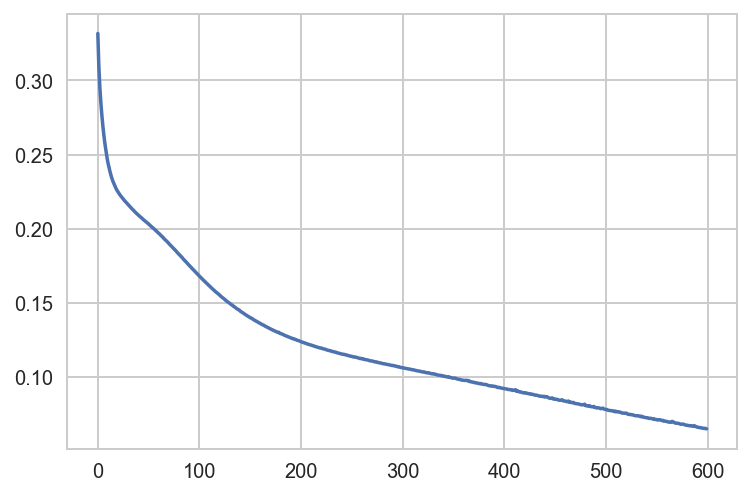

In [286]:
plt.plot(hist2.history['loss'])
plt.show()

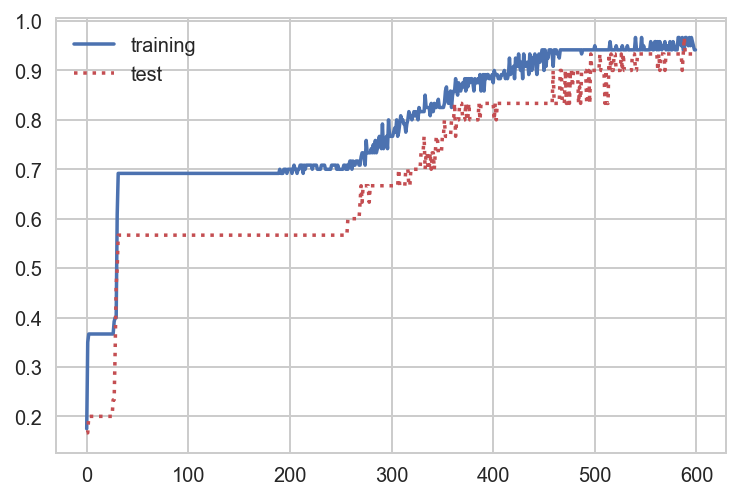

In [287]:
plt.plot(hist2.history['acc'], 'b-', label="training")
plt.plot(hist2.history['val_acc'], 'r:', label="test")
plt.legend()
plt.show()

# 그레디언트 소멸 문제
 - 시그모이드 함수의 도함수 그래프의 모양

# 신경망 성능 개선

# 소프트맥스 출력
 - 마치 확률인 것처럼 보이게 만드는 함수

# Olibeti face recognition (숙제)

In [311]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
X_train, X_test, y_train, y_test = model_selection.train_test_split(faces.data, faces.target, test_size=0.4, random_state=0)

In [327]:
y_train = np_utils.to_categorical(y_train, 40)
y_test = np_utils.to_categorical(y_test, 40)
y_train[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.]])

In [335]:
64*64

4096

In [336]:
oli_model = Sequential()
oli_model.add(Dense(30, input_dim=4096, activation='sigmoid'))
oli_model.add(Dense(40, activation='sigmoid'))
oli_model.compile(optimizer=SGD(lr=0.2), loss='mean_squared_error', metrics=['accuracy'])

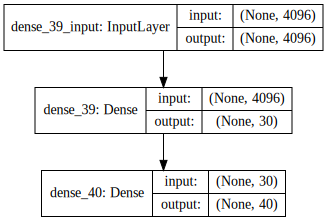

In [340]:
SVG(model_to_dot(oli_model, show_shapes=True).create(prog='dot', format='svg'))